<a href="https://colab.research.google.com/github/rasikakaple07/Syntax_Error/blob/main/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imutils
import easyocr
import csv
from datetime import datetime
import pytz


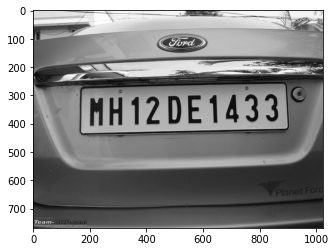

In [205]:
img = cv2.imread("image1.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

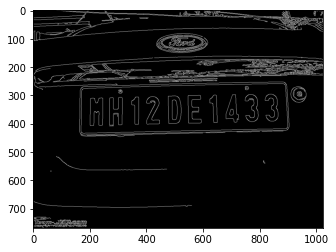

In [206]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [207]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contourss = imutils.grab_contours(keypoints)
contours = sorted(contourss, key=cv2.contourArea, reverse=True)[:10]
#print(contours)
len(contours)

10

In [208]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
len(location)        

4

In [209]:
location

array([[[891, 265]],

       [[180, 276]],

       [[169, 427]],

       [[891, 418]]], dtype=int32)

In [210]:
approx[1][0][0]

180

In [211]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], -1,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

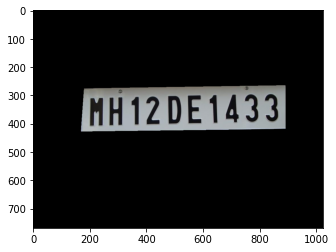

In [212]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [213]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

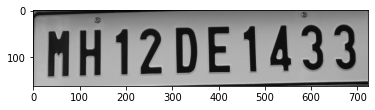

In [214]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [215]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[16, 12], [715, 12], [715, 158], [16, 158]],
  'HHI2 DE1433',
  0.39100828979332175)]

HHI2 DE1433


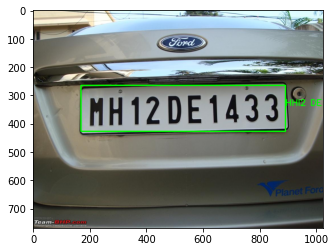

In [216]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
number=str(text)
print(number)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [217]:
number1=number.replace(" ","")
print(number1)
def SearchByNumber():
  csv_file=csv.reader(open('vehicle numbers database.csv', 'r'))
  for row in csv_file:
    if number1==row[0]:
      print(row)
      saved_data=open('saved_data', 'w')
      writer=csv.writer(saved_data)
      writer.writerow(row)
  
SearchByNumber()


HHI2DE1433
['HHI2DE1433', 'Anikesh', '44', 'Nagpur', 'Maharashtra', 'yes']
